In [1]:
%matplotlib inline
from pylab import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from treatment_sims_2023_06_02 import *

Splikes version  0.1.2
Plasticnet version  0.1.9
macOS-10.16-x86_64-i386-64bit


In [3]:
base='sims/2023-06-02'
if not os.path.exists(base):
    print(f"mkdir {base}")
    os.mkdir(base)

## Just to the blur with no jitter

In [4]:
rf_size=19
eta=1e-6
number_of_neurons=25
number_of_processes=4

mu_c_mat=[0,7.5,0,7.5]
sigma_c_mat=[0,2,2,0]

blur_mat=linspace(0,12,13)
blur_mat=blur_mat.astype(int)
blur_mat

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [5]:
from collections import namedtuple
params = namedtuple('params', ['count', 'eta','noise','blur','number_of_neurons','sfname','mu_c','sigma_c'])
all_params=[]
count=0
eta_count=0
noise_count=0
open_eye_noise=0.1

for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    for blur_count,blur in enumerate(blur_mat):

        all_params.append(params(count=count,
                     eta=eta,
                     noise=open_eye_noise,
                     blur=blur,
                     number_of_neurons=number_of_neurons,
             sfname=f'{base}/deficit {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c {blur} blur.asdf',
                            mu_c=mu_c,sigma_c=sigma_c))

        count+=1
    for a in all_params[:5]:
        print(a)
    print("[....]")
    for a in all_params[-5:]:
        print(a)



params(count=0, eta=1e-06, noise=0.1, blur=0, number_of_neurons=25, sfname='sims/2023-06-02/deficit 25 neurons 0 mu_c 0 sigma_c 0 blur.asdf', mu_c=0, sigma_c=0)
params(count=1, eta=1e-06, noise=0.1, blur=1, number_of_neurons=25, sfname='sims/2023-06-02/deficit 25 neurons 0 mu_c 0 sigma_c 1 blur.asdf', mu_c=0, sigma_c=0)
params(count=2, eta=1e-06, noise=0.1, blur=2, number_of_neurons=25, sfname='sims/2023-06-02/deficit 25 neurons 0 mu_c 0 sigma_c 2 blur.asdf', mu_c=0, sigma_c=0)
params(count=3, eta=1e-06, noise=0.1, blur=3, number_of_neurons=25, sfname='sims/2023-06-02/deficit 25 neurons 0 mu_c 0 sigma_c 3 blur.asdf', mu_c=0, sigma_c=0)
params(count=4, eta=1e-06, noise=0.1, blur=4, number_of_neurons=25, sfname='sims/2023-06-02/deficit 25 neurons 0 mu_c 0 sigma_c 4 blur.asdf', mu_c=0, sigma_c=0)
[....]
params(count=8, eta=1e-06, noise=0.1, blur=8, number_of_neurons=25, sfname='sims/2023-06-02/deficit 25 neurons 0 mu_c 0 sigma_c 8 blur.asdf', mu_c=0, sigma_c=0)
params(count=9, eta=1e-06, 

## Premake the image files

In [7]:
base_image_file='asdf/bbsk081604_all_scale2.asdf'
print("Base Image File:",base_image_file)

normal_image=pi5.filtered_images(
                                base_image_file,
                                {'type':'dog','sd1':1,'sd2':3},
                                {'type':'norm'},
                                )

for blur in blur_mat:

    Lfname=pi5.filtered_images(
                                base_image_file,
                                {'type':'blur','size':blur},
                                {'type':'dog','sd1':1,'sd2':3},
                                {'type':'norm'},
                                )




 [#############################100% (ETA: 0.0 s)#############################]
Saving cache_images/cache_images_1efcae7f99588ad2ddc6b47b47241c1b.asdf...Resolution float64 -> uint16
done.


In [7]:
def run_one(params,overwrite=False):
    import plasticnet as pn
    count,eta,noise,blur,number_of_neurons,sfname,mu_c,sigma_c=(params.count,params.eta,params.noise,params.blur,
                                        params.number_of_neurons,params.sfname,params.mu_c,params.sigma_c)
    
    if not overwrite and os.path.exists(sfname):
        return sfname
    
    seq=pn.Sequence()

    t=16*day*2
    ts=1*hour

    seq+=blur_jitter_deficit(blur=[blur,-1],
                                total_time=t,
                                noise=noise,eta=eta,number_of_neurons=number_of_neurons,
                                mu_c=mu_c,sigma_c=sigma_c,
                                save_interval=ts)

    
    seq.run(display_hash=False)
    pn.save(sfname,seq) 
    
    return sfname
    


In [9]:
%%time
run_one(all_params[0],overwrite=True)

Using cache_images/cache_images_f6d484251bbeda8699ed0b15303a996c.asdf from cache.Using cache_images/cache_images_f6d484251bbeda8699ed0b15303a996c.asdf from cache.[.] Sequence Time Elapsed...14 m, 10.25 s
CPU times: user 54min 21s, sys: 22min 16s, total: 1h 16min 38s
Wall time: 14min 18s


'sims/2023-06-02/deficit 25 neurons 0 mu_c 0 sigma_c 0 blur.asdf'

In [8]:
real_time=13*60+ 19

In [8]:
do_params=make_do_params(all_params)
len(do_params)
#run_one(do_params[0],overwrite=True)

0

In [10]:
if len(do_params)>13:
    for a in do_params[:5]:
        print(a)
    print("[....]")
    for a in do_params[-5:]:
        print(a)
else:
    for a in do_params:
        print(a)
    

print(len(do_params))

print(time2str(real_time*len(do_params)/number_of_processes))


params(count=1, eta=1e-06, noise=0.1, blur=1, number_of_neurons=25, sfname='sims/2023-06-02/deficit 25 neurons 0 mu_c 0 sigma_c 1 blur.asdf', mu_c=0, sigma_c=0)
params(count=2, eta=1e-06, noise=0.1, blur=2, number_of_neurons=25, sfname='sims/2023-06-02/deficit 25 neurons 0 mu_c 0 sigma_c 2 blur.asdf', mu_c=0, sigma_c=0)
params(count=3, eta=1e-06, noise=0.1, blur=3, number_of_neurons=25, sfname='sims/2023-06-02/deficit 25 neurons 0 mu_c 0 sigma_c 3 blur.asdf', mu_c=0, sigma_c=0)
params(count=4, eta=1e-06, noise=0.1, blur=4, number_of_neurons=25, sfname='sims/2023-06-02/deficit 25 neurons 0 mu_c 0 sigma_c 4 blur.asdf', mu_c=0, sigma_c=0)
params(count=5, eta=1e-06, noise=0.1, blur=5, number_of_neurons=25, sfname='sims/2023-06-02/deficit 25 neurons 0 mu_c 0 sigma_c 5 blur.asdf', mu_c=0, sigma_c=0)
[....]
params(count=47, eta=1e-06, noise=0.1, blur=8, number_of_neurons=25, sfname='sims/2023-06-02/deficit 25 neurons 7.5 mu_c 0 sigma_c 8 blur.asdf', mu_c=7.5, sigma_c=0)
params(count=48, eta=1

In [11]:
if do_params:
    pool = Pool(processes=number_of_processes)
    result = pool.map_async(run_one, do_params)
    print(result.get())

Using cache_images/cache_images_472bb154ace79b13b68199030234023a.asdf from cache.Using cache_images/cache_images_6d1a0220b31fdb113080558cab57a601.asdf from cache.Using cache_images/cache_images_5f8b16b38b099ead0e02cc4ce71f123b.asdf from cache.Using cache_images/cache_images_f6d484251bbeda8699ed0b15303a996c.asdf from cache.Using cache_images/cache_images_f6d484251bbeda8699ed0b15303a996c.asdf from cache.Using cache_images/cache_images_f6d484251bbeda8699ed0b15303a996c.asdf from cache.Using cache_images/cache_images_f6d484251bbeda8699ed0b15303a996c.asdf from cache.Using cache_images/cache_images_f6d484251bbeda8699ed0b15303a996c.asdf from cache.[[[[.] Sequence Time Elapsed...19 m, 55.65 s
.] Sequence Time Elapsed...19 m, 55.66 s
.] Sequence Time Elapsed...19 m, 56.19 s
.] Sequence Time Elapsed...19 m, 57.07 s
Using cache_images/cache_images_472bb154ace79b13b68199030234023a.asdf from cache.Using cache_images/cache_images_f6d484251bbeda8699ed0b15303a996c.asdf from cache.[Using cache_images/ca

## View the sims

In [12]:
sfname=all_params[0].sfname
R=Results(sfname)

/Users/bblais/tmp/ipykernel_46799/584884176.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pcolormesh(w_im[n,c,...],cmap=py.cm.gray,


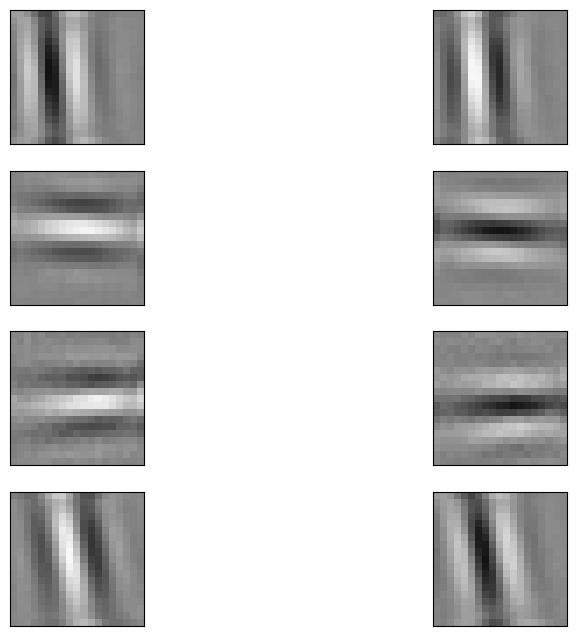

In [13]:
t,y,θ,W=R[16*day]
vmin=W.min()
vmax=W.max()

w_im=R.weight_image(W)
count=1
for n in range(4):
    for c in range(2):
        subplot(4,2,count)
        pcolormesh(w_im[n,c,...],cmap=py.cm.gray,
                        vmin=vmin,vmax=vmax)
        ax2=gca()
        ax2.set_aspect('equal')
        ax2.set_xticklabels([])
        ax2.set_yticklabels([])
        ax2.xaxis.set_ticks_position('none') 
        ax2.yaxis.set_ticks_position('none') 
        
        count+=1


In [6]:
RR={}
count=0
for params in tqdm(all_params):
    RR[params.sfname]=Results(params.sfname)

  0%|          | 0/52 [00:00<?, ?it/s]

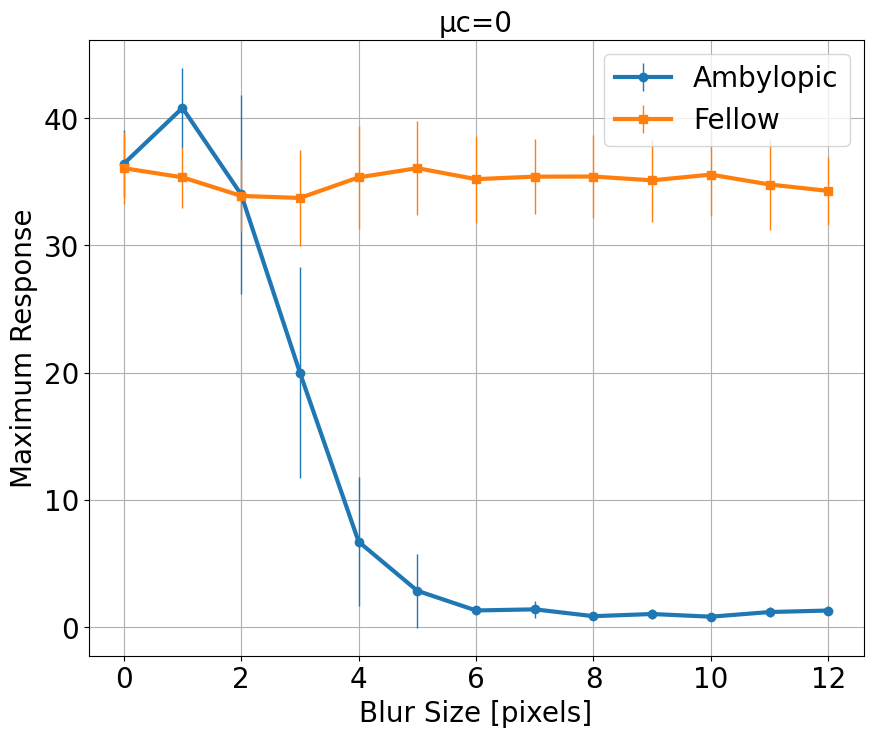

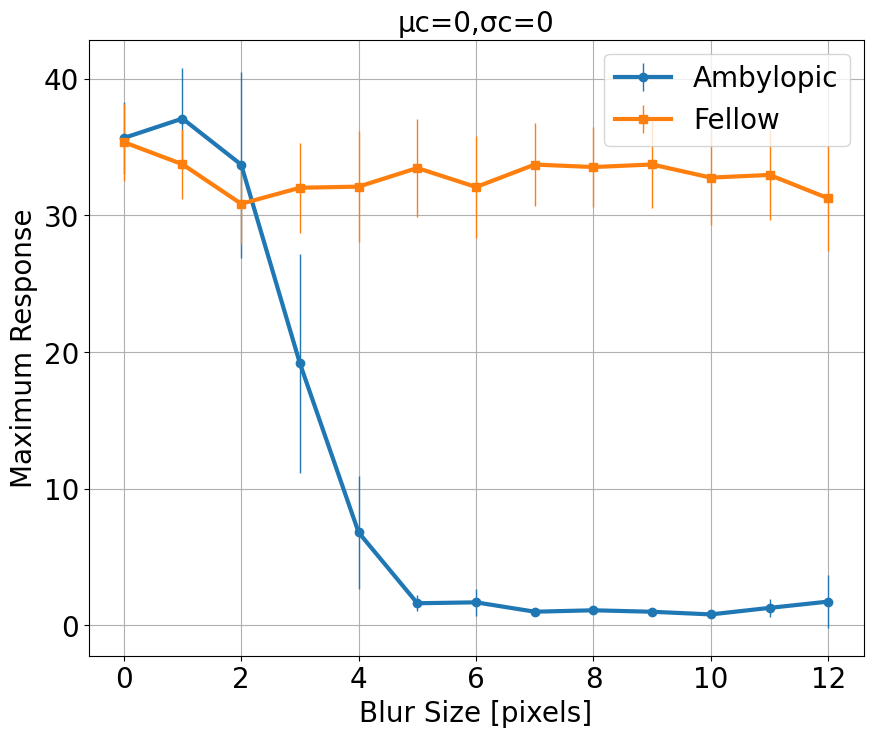

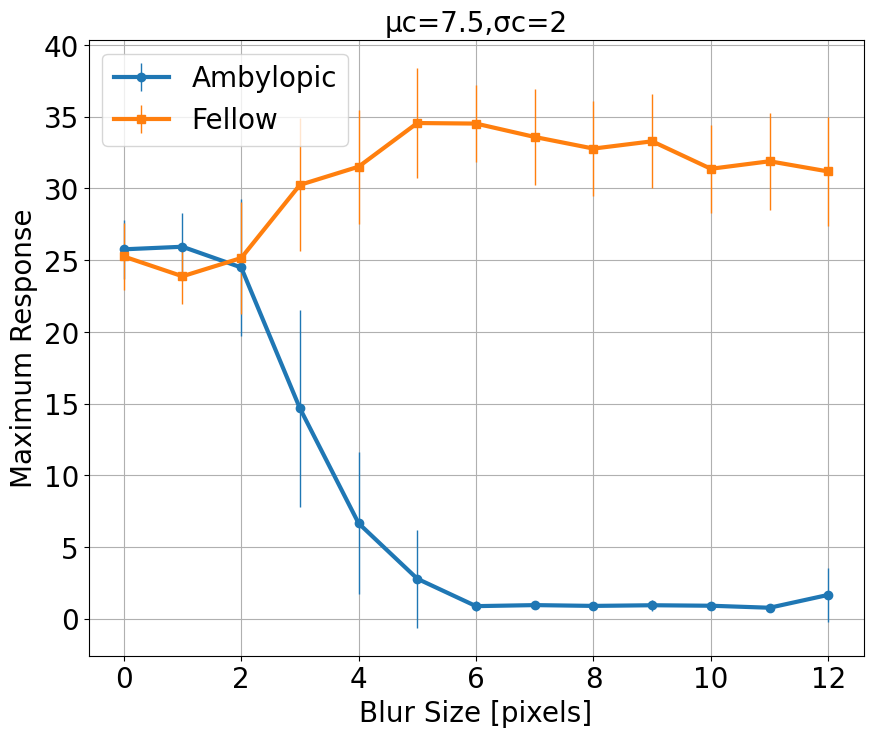

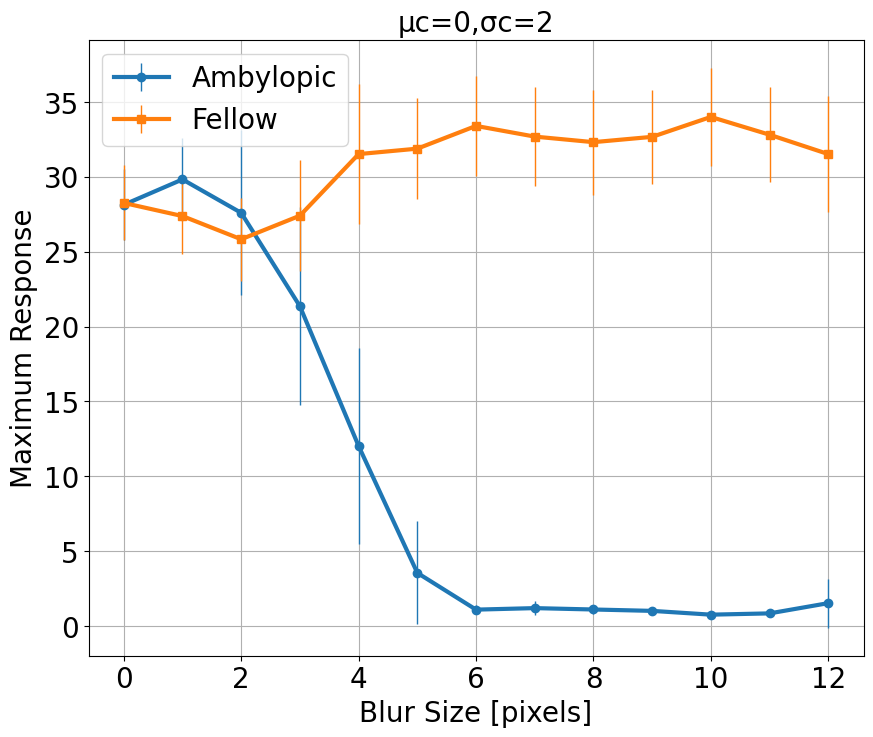

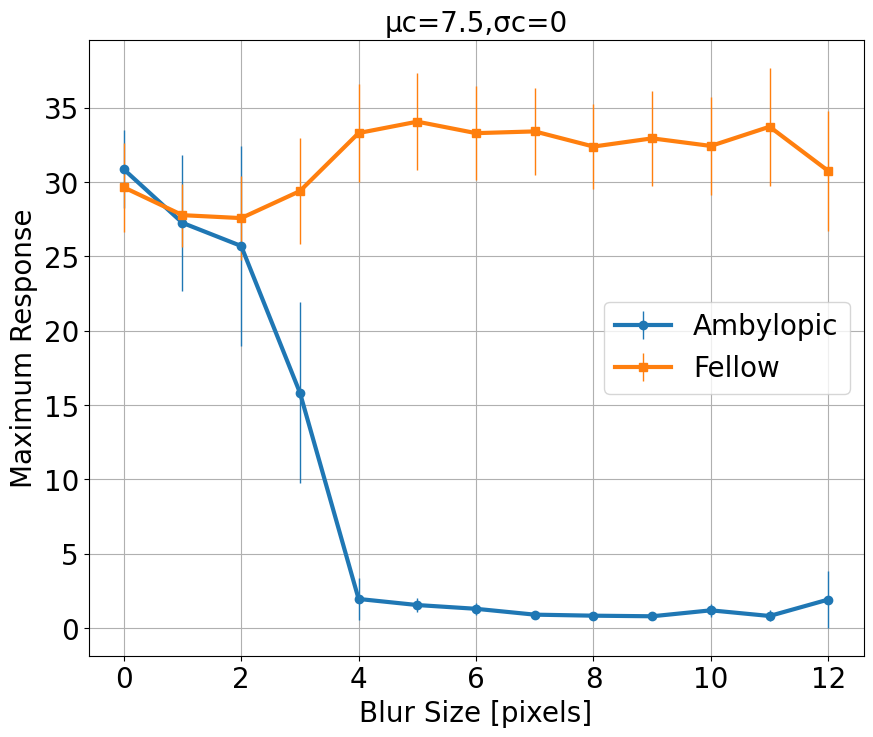

In [15]:
count=0
for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    s=Storage()
    for blur_count,blur in enumerate(blur_mat):
        params=all_params[count]
        count+=1
        R=RR[params.sfname]
        blur=params.blur
        μ1,μ2=R.μσ[0][0]
        σ1,σ2=R.μσ[1][0]

        s+=blur,μ1,μ2,σ1,σ2


    blur,μ1,μ2,σ1,σ2=s.arrays()

    figure()
    errorbar(blur,μ1,yerr=2*σ1,marker='o',elinewidth=1,label='Ambylopic')
    errorbar(blur,μ2,yerr=2*σ2,marker='s',elinewidth=1,label='Fellow')
    xlabel('Blur Size [pixels]')
    ylabel('Maximum Response')
    title(f'μc={mu_c},σc={sigma_c}')
    legend()    

Manuscript/resources/fig-deficit-response-blur.png
Manuscript/resources/fig-deficit-response-blur.svg


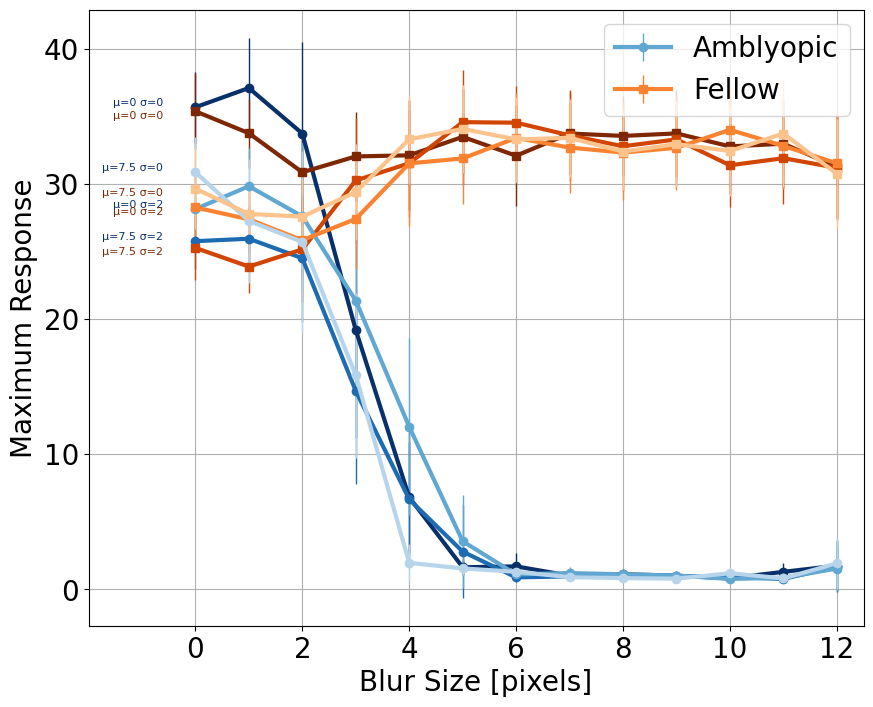

In [7]:
v=np.flip(linspace(0.3,1,4))

count=0
idx=0
for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    s=Storage()
    for blur_count,blur in enumerate(blur_mat):
        params=all_params[count]
        count+=1
        R=RR[params.sfname]
        blur=params.blur
        μ1,μ2=R.μσ[0][0]
        σ1,σ2=R.μσ[1][0]

        s+=blur,μ1,μ2,σ1,σ2


    blur,μ1,μ2,σ1,σ2=s.arrays()

    if idx==2:
        errorbar(blur,μ1,yerr=2*σ1,marker='o',elinewidth=1,label=f'Amblyopic',color=cm.Blues(v[idx]))
        errorbar(blur,μ2,yerr=2*σ2,marker='s',elinewidth=1,label=f'Fellow',color=cm.Oranges(v[idx]))
    else:
        errorbar(blur,μ1,yerr=2*σ1,marker='o',elinewidth=1,label='_',color=cm.Blues(v[idx]))
        errorbar(blur,μ2,yerr=2*σ2,marker='s',elinewidth=1,label='_',color=cm.Oranges(v[idx]))
        
        
    dy=0.3
    text(-.6,μ1[:1]+dy,f'μ={mu_c} σ={sigma_c}',va='center',ha='right',size=8,color=cm.Blues(v[0]))         
    text(-.6,μ2[:1]-dy,f'μ={mu_c} σ={sigma_c}',va='center',ha='right',size=8,color=cm.Oranges(v[0]))
    
    idx+=1        
    
xlabel('Blur Size [pixels]')
ylabel('Maximum Response')
legend()    
gca().set_xticks(range(0,13,2))
xlim([-2,12.5])

savefig('fig-deficit-response-blur.png')

Manuscript/resources/fig-deficit-ODI-blur.png
Manuscript/resources/fig-deficit-ODI-blur.svg


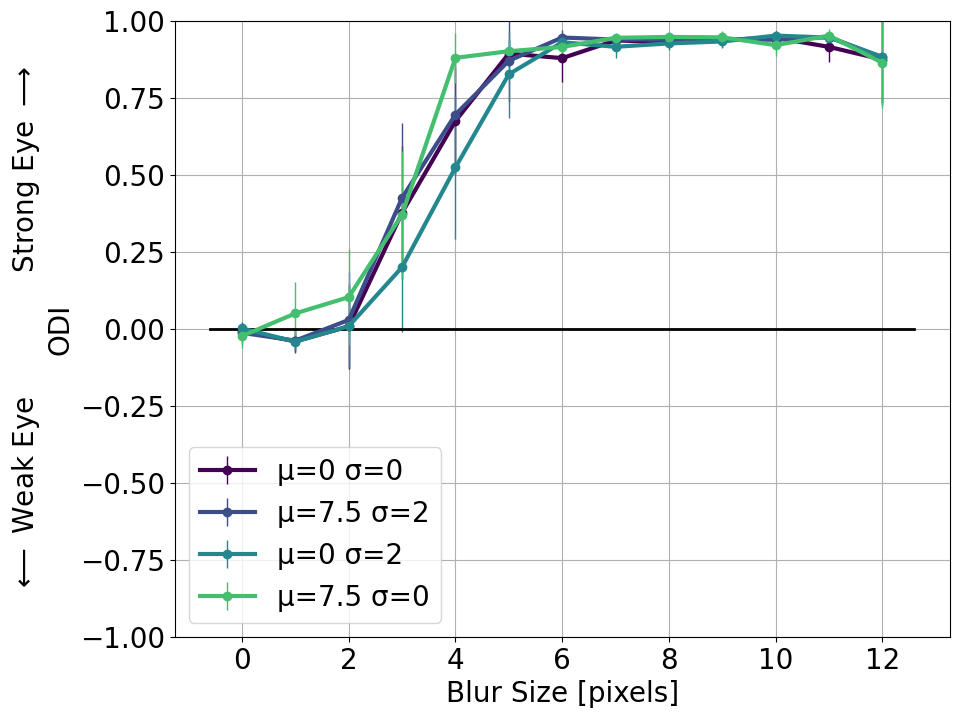

In [8]:
v=np.flip(linspace(0.3,1,4))

count=0
idx=0
for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    s=Storage()
    for blur_count,blur in enumerate(blur_mat):
        params=all_params[count]
        count+=1
        R=RR[params.sfname]
        blur=params.blur
        μ,σ=μσ(R.ODI[-1])
        
        s+=blur,μ,σ


    blur,μ,σ=s.arrays()

    errorbar(blur,μ,yerr=2*σ,marker='o',elinewidth=1,label=f'μ={mu_c} σ={sigma_c}',color=cm.viridis(1-v[idx]))
    
    idx+=1
    
xlabel('Blur Size [pixels]')
ylabel('Maximum Response')
ylabel(r'$\longleftarrow$ Weak Eye              Strong Eye $\longrightarrow$'+"\nODI")

legend()    

ylim([-1,1])
xl=xlim()
plot(xl,[0,0],'k-',lw=2)
# gca().set_xticks(range(0,13,2))

savefig('fig-deficit-ODI-blur.png')    

Manuscript/resources/fig-deficit-response-ODI-blur.png
Manuscript/resources/fig-deficit-response-ODI-blur.svg


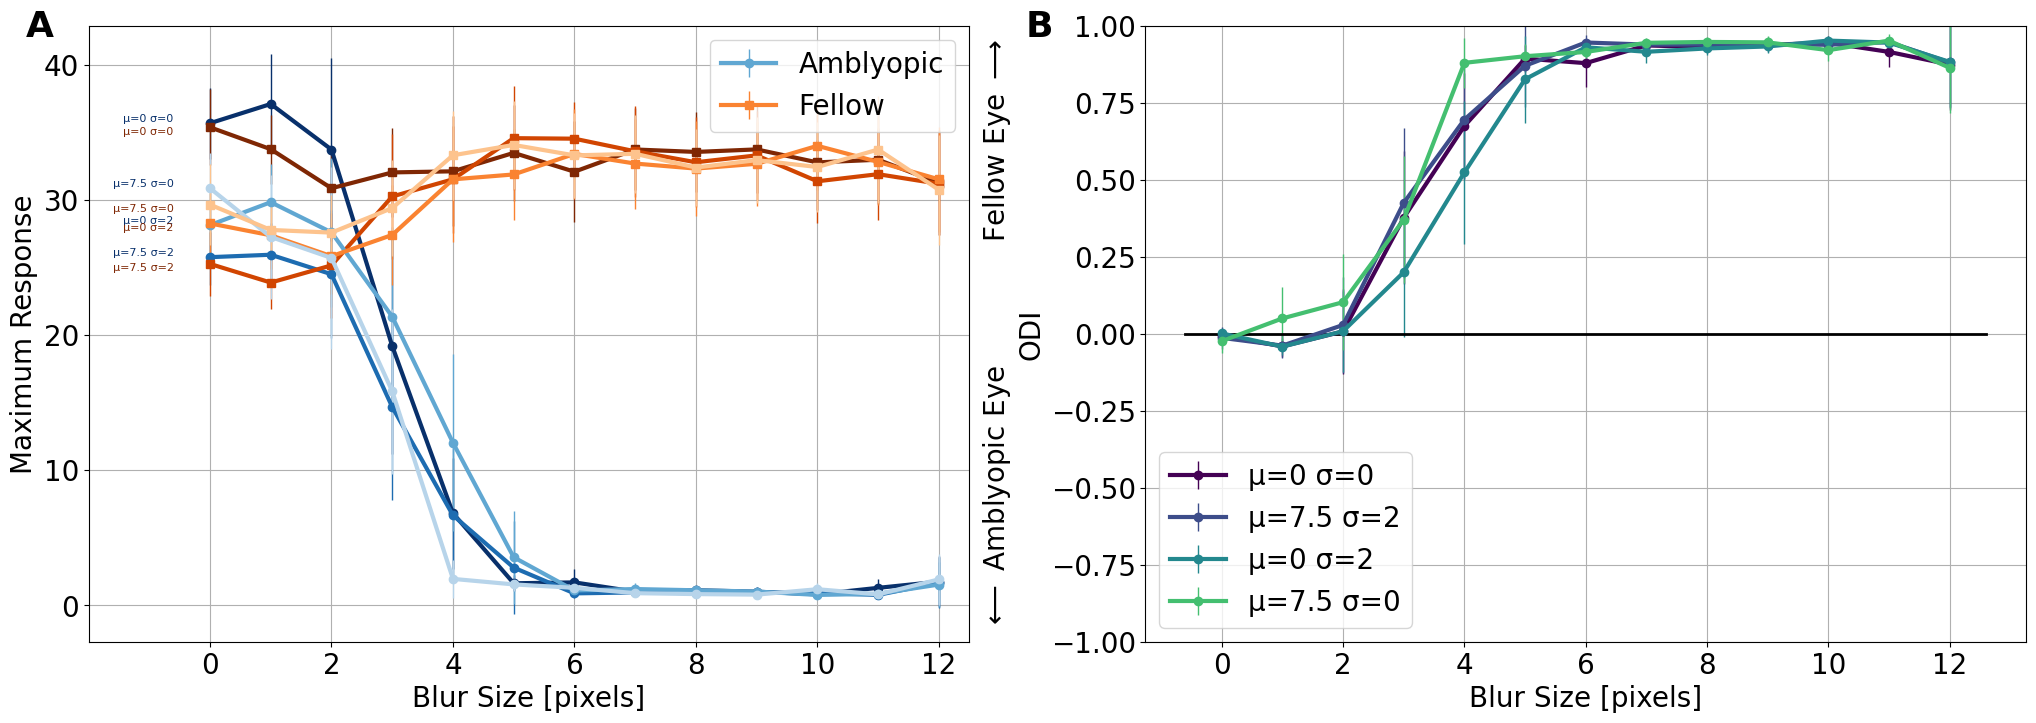

In [10]:
figure(figsize=(25,8))
subplot(1,2,1)
v=np.flip(linspace(0.3,1,4))

count=0
idx=0
for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    s=Storage()
    for blur_count,blur in enumerate(blur_mat):
        params=all_params[count]
        count+=1
        R=RR[params.sfname]
        blur=params.blur
        μ1,μ2=R.μσ[0][0]
        σ1,σ2=R.μσ[1][0]

        s+=blur,μ1,μ2,σ1,σ2


    blur,μ1,μ2,σ1,σ2=s.arrays()

    if idx==2:
        errorbar(blur,μ1,yerr=2*σ1,marker='o',elinewidth=1,label=f'Amblyopic',color=cm.Blues(v[idx]))
        errorbar(blur,μ2,yerr=2*σ2,marker='s',elinewidth=1,label=f'Fellow',color=cm.Oranges(v[idx]))
    else:
        errorbar(blur,μ1,yerr=2*σ1,marker='o',elinewidth=1,label='_',color=cm.Blues(v[idx]))
        errorbar(blur,μ2,yerr=2*σ2,marker='s',elinewidth=1,label='_',color=cm.Oranges(v[idx]))
        
        
    dy=0.3
    text(-.6,μ1[:1]+dy,f'μ={mu_c} σ={sigma_c}',va='center',ha='right',size=8,color=cm.Blues(v[0]))         
    text(-.6,μ2[:1]-dy,f'μ={mu_c} σ={sigma_c}',va='center',ha='right',size=8,color=cm.Oranges(v[0]))
    
    idx+=1        
    
xlabel('Blur Size [pixels]')
ylabel('Maximum Response')
legend()    
gca().set_xticks(range(0,13,2))
xlim([-2,12.5])


subplot(1,2,2)
v=np.flip(linspace(0.3,1,4))

count=0
idx=0
for mu_c,sigma_c in zip(mu_c_mat,sigma_c_mat):
    s=Storage()
    for blur_count,blur in enumerate(blur_mat):
        params=all_params[count]
        count+=1
        R=RR[params.sfname]
        blur=params.blur
        μ,σ=μσ(R.ODI[-1])
        
        s+=blur,μ,σ


    blur,μ,σ=s.arrays()

    errorbar(blur,μ,yerr=2*σ,marker='o',elinewidth=1,label=f'μ={mu_c} σ={sigma_c}',color=cm.viridis(1-v[idx]))
    
    idx+=1
    
xlabel('Blur Size [pixels]')
ylabel('Maximum Response')
ylabel(r'$\longleftarrow$ Amblyopic Eye              Fellow Eye $\longrightarrow$'+"\nODI")

legend()    

ylim([-1,1])
xl=xlim()
plot(xl,[0,0],'k-',lw=2)


plt.text(.1, 0.9, "A", transform=plt.gcf().transFigure,
    fontsize=26, fontweight='bold', va='top')

plt.text(.5, 0.9, "B", transform=plt.gcf().transFigure,
    fontsize=26, fontweight='bold', va='top')

savefig('fig-deficit-response-ODI-blur.png')

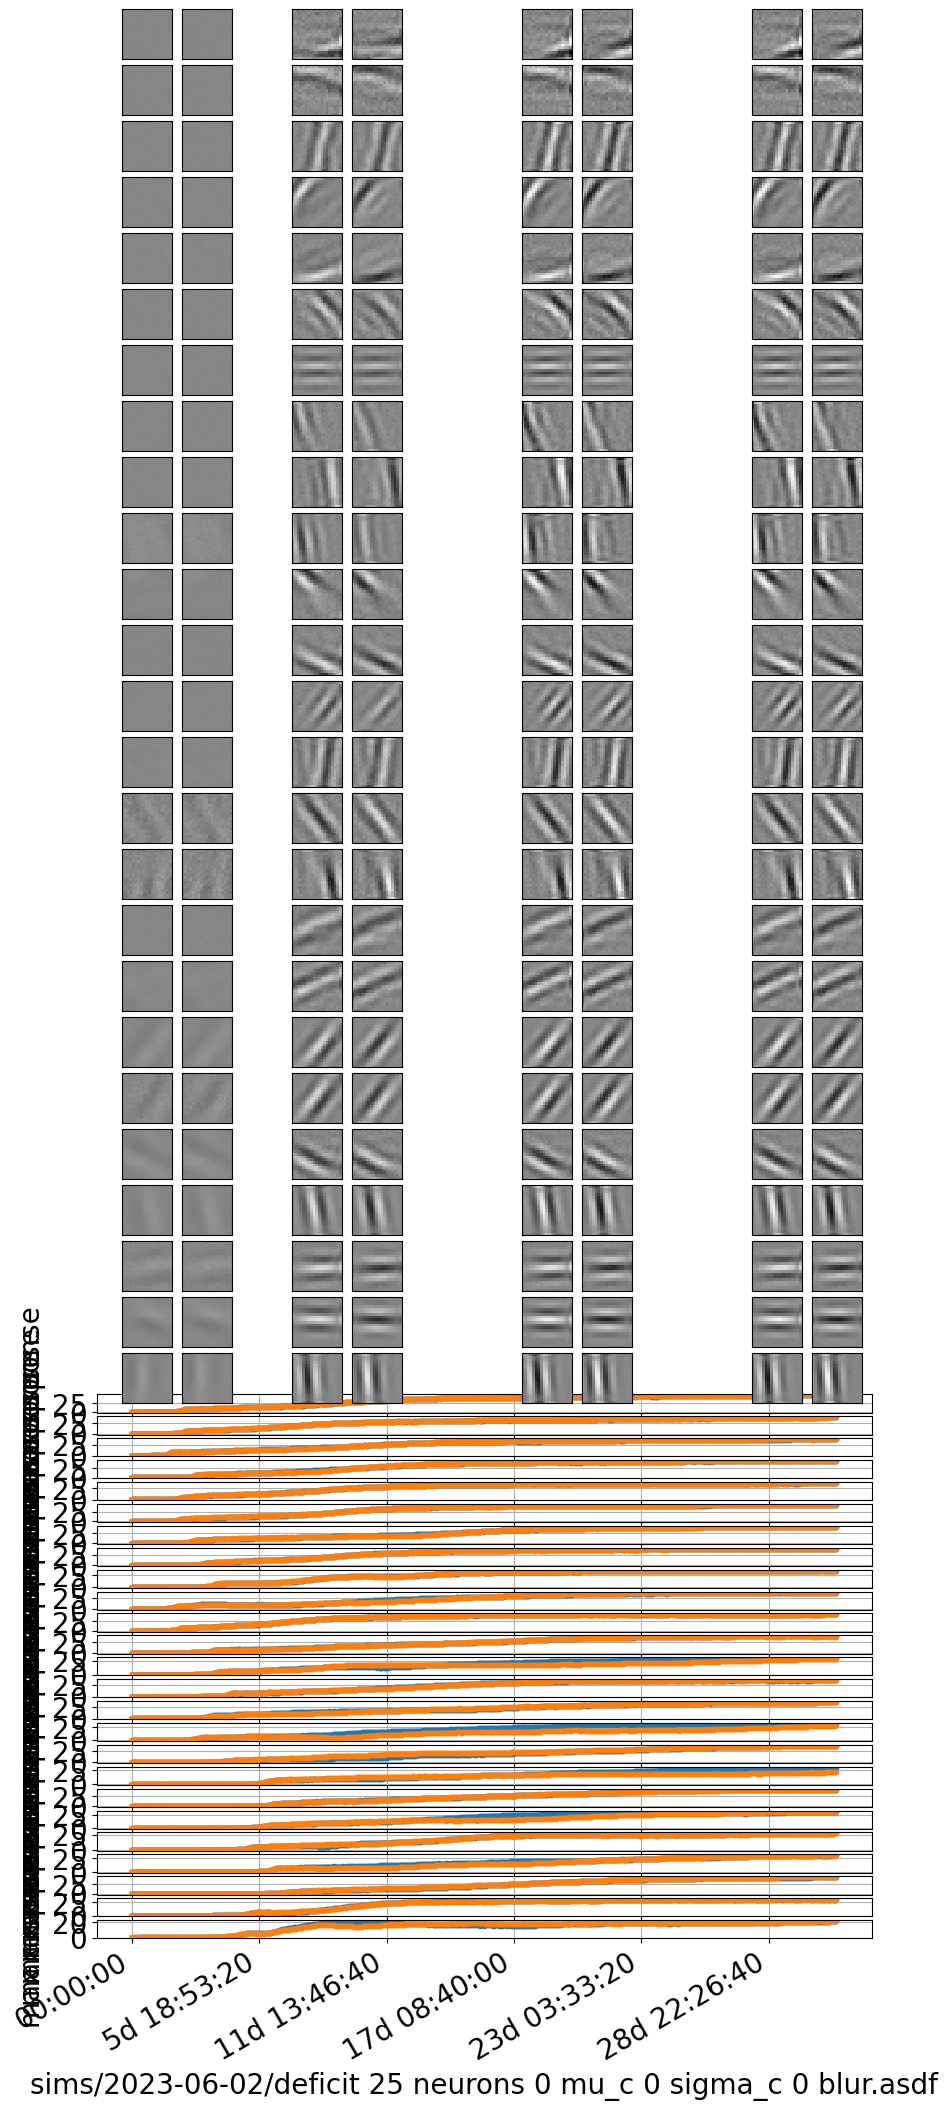

In [16]:
total_time=R.t.max()

figure()
plot_max_response(sfname)
xlabel(sfname)
plot_mini_rfs(sfname,
              total_time/10,.15,.85,
              2*total_time/3,.32,.85,
              2*2*total_time/3,.55,.85,
              2*3*total_time/3,.78,.85,
             )
